In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import json
import numpy as np

# 3차 모델링(토큰 라벨링)

## 중간 결과 시각화

In [2]:
train_64_40 = []
train_64_50 = []
train_64_70 = []
train_80_90 = []
train_100_100 = []
train_100_200 = []

with open("model_storage/labeling_model_1/train_state_64_40.json", mode="r+", encoding="utf-8") as fp:
    train_64_40 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_64_50.json", mode="r+", encoding="utf-8") as fp:
    train_64_50 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_64_70.json", mode="r+", encoding="utf-8") as fp:
    train_64_70 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_80_90.json", mode="r+", encoding="utf-8") as fp:
    train_80_90 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_100_100.json", mode="r+", encoding="utf-8") as fp:
    train_100_100 = json.loads(fp.read())
with open("model_storage/labeling_model_1/train_state_100_200.json", mode="r+", encoding="utf-8") as fp:
    train_100_200 = json.loads(fp.read())

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 12

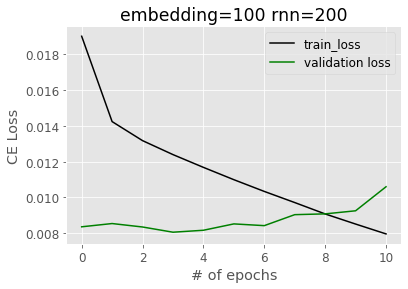

In [4]:
fig, ax = plt.subplots()
ax.set_title("embedding=100 rnn=200")
ax.plot(train_100_200["train_loss"], color='black')
ax.plot(train_100_200["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

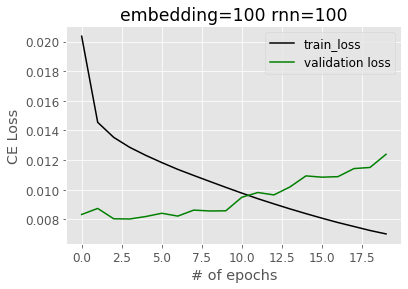

In [5]:
fig, ax = plt.subplots()
ax.set_title("embedding=100 rnn=100")
ax.plot(train_100_100["train_loss"], color='black')
ax.plot(train_100_100["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

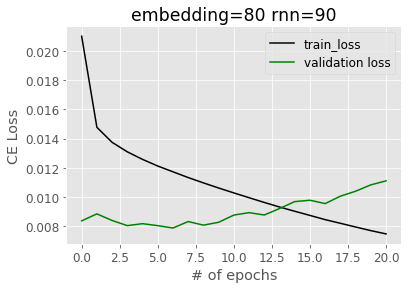

In [6]:
fig, ax = plt.subplots()
ax.set_title("embedding=80 rnn=90")
ax.plot(train_80_90["train_loss"], color='black')
ax.plot(train_80_90["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

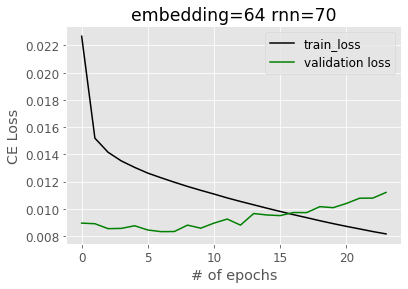

In [7]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=70")
ax.plot(train_64_70["train_loss"], color='black')
ax.plot(train_64_70["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

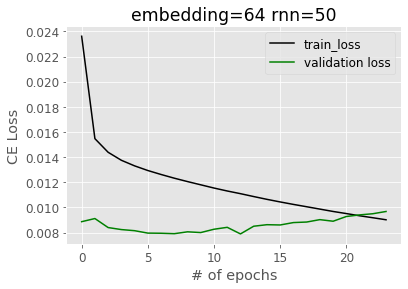

In [8]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=50")
ax.plot(train_64_50["train_loss"], color='black')
ax.plot(train_64_50["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

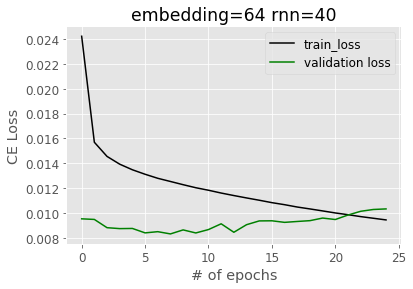

In [9]:
fig, ax = plt.subplots()
ax.set_title("embedding=64 rnn=40")
ax.plot(train_64_40["train_loss"], color='black')
ax.plot(train_64_40["val_loss"], color='green')
ax.legend(labels=["train_loss", "validation loss"])
ax.set_xlabel('# of epochs')
ax.set_ylabel('CE Loss')

plt.show()

# 4차 라벨링 모델

## 결과 분석

In [2]:
eval = {}
with open("model_storage\\labeling_model_4\\evaluation.json", mode="r+", encoding="utf-8") as fp:
    eval = json.loads(fp.read())

print(eval)

{'acc.': 99.11271704315595, 'f1_score': 83.28852491566884}


In [2]:
predictions = {}
with open("model_storage\\labeling_model_4\\prediction.json", mode="r+", encoding="utf-8") as fp:
    predictions = json.loads(fp.read())

predictions[:10]

[{'input': '우리는 짝이 되잖아. ', 'label': '', 'pred': '짝 '},
 {'input': '주말 도미 미 <UNK>가 액션 쪽이거든 근데 약간 ', 'label': '', 'pred': ''},
 {'input': '응~ 너는 취미 피파 말고 또 다른 게 있어? ', 'label': '', 'pred': ''},
 {'input': '어 ', 'label': '', 'pred': ''},
 {'input': '뭔가 중학교 때도 재밌었지만 고등학교 때는 너무 힘든데 그 막 쉬는 시간에 막 놀고 ',
  'label': '',
  'pred': ''},
 {'input': '학과 당하고 하고 ', 'label': '', 'pred': ''},
 {'input': '그러니까 그 저 법원에서 그러더라고 북부지원 그 사람이 우리 변호사가 그거 저기 재출고를 냈거든. ',
  'label': '',
  'pred': ''},
 {'input': '내가 너무 신랑을 미워했을까 엄청 눈물을 많이 흘렸대 내가 저 남자한테 잘해줄 걸 ',
  'label': '',
  'pred': ''},
 {'input': '뭐 가방. ', 'label': '', 'pred': ''},
 {'input': '일 초 만에 문을 열었더니 제 정장용 슬리퍼 구두를 ', 'label': '', 'pred': ''}]

In [3]:
예측이_있는_샘플 = [pred for pred in predictions if len(pred["pred"]) > 0]

예측이_있는_샘플

[{'input': '우리는 짝이 되잖아. ', 'label': '', 'pred': '짝 '},
 {'input': '뭐~ 본 것들도 엄청나게 많은디 뭐~ 이제 그거 말고도 뭐~ ',
  'label': '##은디 ',
  'pred': '##은디 '},
 {'input': '그러먼은 일부러 뭣 하나 사. ', 'label': '그러먼 ##은 ', 'pred': '그러먼 ##은 '},
 {'input': '둘 중의 하나일 것이여. ', 'label': '##여 ', 'pred': '##여 '},
 {'input': '그리고 인제 제트플립 같은 경우는 그래도 어~ 신박하고 ', 'label': '', 'pred': '인제 '},
 {'input': '사 대 어디 사제를 낳았 되돌아오기 사 대를 낳았대 그런데 ', 'label': '', 'pred': '사제 '},
 {'input': '아니요 저는 상과 없 필요 없어요 했더 오만 원 주고 가드라? ',
  'label': '##드라 ',
  'pred': '##드라 '},
 {'input': '그기 있는 애들이 그렇게 되기까지는 부모들이 제 옆에서예고 다 예고야 거의 반의 반 ',
  'label': '',
  'pred': '그기 '},
 {'input': '뭐 자기가 어뜨케 엄두도 못내고 ', 'label': '어뜨케 ', 'pred': '어뜨케 '},
 {'input': '게임을 키는 순간 갑자기 컴피터가 틱 꺼지면서 연기가 나는 거여. ',
  'label': '##여 ',
  'pred': '##여 '},
 {'input': '해외여행 많이 가고 싶은데 최근에 코로나가 이르케 상황이 심각해지면서 ',
  'label': '',
  'pred': '이르 ##케 '},
 {'input': '그래서 쫌 걱정이 되기는 해 그리구 인제 진짜 몸도 어~ 몸이 진짜 어~ 따라 주지두 않고 ',
  'label': '쫌 그리구 ',
  'pred': '쫌 그리구 '},
 {'input': '그래 모냥이 꼬치가루로 입

In [4]:
예측이_맞은_샘플 = [pred for pred in 예측이_있는_샘플 if pred["pred"].strip() == pred["label"].strip()]

예측이_맞은_샘플

[{'input': '뭐~ 본 것들도 엄청나게 많은디 뭐~ 이제 그거 말고도 뭐~ ',
  'label': '##은디 ',
  'pred': '##은디 '},
 {'input': '그러먼은 일부러 뭣 하나 사. ', 'label': '그러먼 ##은 ', 'pred': '그러먼 ##은 '},
 {'input': '둘 중의 하나일 것이여. ', 'label': '##여 ', 'pred': '##여 '},
 {'input': '아니요 저는 상과 없 필요 없어요 했더 오만 원 주고 가드라? ',
  'label': '##드라 ',
  'pred': '##드라 '},
 {'input': '뭐 자기가 어뜨케 엄두도 못내고 ', 'label': '어뜨케 ', 'pred': '어뜨케 '},
 {'input': '게임을 키는 순간 갑자기 컴피터가 틱 꺼지면서 연기가 나는 거여. ',
  'label': '##여 ',
  'pred': '##여 '},
 {'input': '그래서 쫌 걱정이 되기는 해 그리구 인제 진짜 몸도 어~ 몸이 진짜 어~ 따라 주지두 않고 ',
  'label': '쫌 그리구 ',
  'pred': '쫌 그리구 '},
 {'input': '쫌 어렵더라고요. ', 'label': '쫌 ', 'pred': '쫌 '},
 {'input': '삼겹살도 꾸워 먹었는데 ', 'label': '꾸 ##워 ', 'pred': '꾸 ##워 '},
 {'input': '이제 그런 거를 쪼금씩 가끔씩 하기도 하고잉 ', 'label': '##고잉 ', 'pred': '##고잉 '},
 {'input': '혹시 풋살 좋아혀? ', 'label': '##혀 ', 'pred': '##혀 '},
 {'input': '왜냐면 그게 뭔가 악효과인 거 같여 뭐~ 일 쁠러스 일이다 뭐~ 이 쁠러스 일이다. ',
  'label': '##여 ',
  'pred': '##여 '},
 {'input': '<UNK>는 <UNK>이나 형성 과정은 자세하게 알 수는 없는디 해동 역사에 따르면 ',


In [7]:
print(len(예측이_맞은_샘플))
print(len([pred for pred in predictions if len(pred["label"]) > 0])) # 라벨이 있는 샘플(사투리가 있는 샘플)

20589
29147


In [6]:
예측이_틀린_샘플 = [pred for pred in predictions if pred["label"] != pred["pred"]]

print(len(예측이_틀린_샘플))

15022


In [7]:
import pandas as pd

df = pd.read_json(json.dumps(예측이_틀린_샘플))
df

,input,label,pred
0,우리는 짝이 되잖아.,,짝
1,완전히 달라져 있는거를 요즘에 알았지.,요즘,
2,그리고 인제 제트플립 같은 경우는 그래도 어~ 신박하고,,인제
3,사 대 어디 사제를 낳았 되돌아오기 사 대를 낳았대 그런데,,사제
4,그기 있는 애들이 그렇게 되기까지는 부모들이 제 옆에서예고 다 예고야 거의 반의 반,,그기
...,...,...,...
15017,처음에 항상 뭐 맛있지 근데 곱창을 먹다 보면 뭔가 인제 허전하지,인제,
15018,근데 자동차 차 운전을 안 하고 갈려고 해가지고,,갈려고
15019,네 저 어렸을 때는 제가 유치원 어린이집 어린이집 다녔는데 그 어린이집 쌤 되게 좋...,쌤,
15020,뭐~ 정말 뭐~ &company-name1& 님처럼 뭐~ 집에다 맥을 달지 않은 이...,,맥


In [9]:
df.to_csv("model_storage\\labeling_model_4\\prediction_pred_wrong.csv")

틀린 것으로 나온 샘플은 대부분 데이터의 노이즈로 인한 문제로 보임. ex) 사투리가 들어있는데 라벨에는 없다고 나온 경우.

또는 사투리가 여러 개 있는데 일부분만 찾아낸 경우.

83점의 F-1 점수와 더불어 모델이 틀린 예측 출력값을 보면 얼추 맞게 사투리를 찾아냈음을 볼 수 있음.

In [4]:
import pandas as pd

df = pd.read_csv("model_storage\\labeling_model_4\\prediction_pred_wrong.csv", index_col=0)
df = df.fillna("")
df

,input,label,pred
0,우리는 짝이 되잖아.,,짝
1,완전히 달라져 있는거를 요즘에 알았지.,요즘,
2,그리고 인제 제트플립 같은 경우는 그래도 어~ 신박하고,,인제
3,사 대 어디 사제를 낳았 되돌아오기 사 대를 낳았대 그런데,,사제
4,그기 있는 애들이 그렇게 되기까지는 부모들이 제 옆에서예고 다 예고야 거의 반의 반,,그기
...,...,...,...
15017,처음에 항상 뭐 맛있지 근데 곱창을 먹다 보면 뭔가 인제 허전하지,인제,
15018,근데 자동차 차 운전을 안 하고 갈려고 해가지고,,갈려고
15019,네 저 어렸을 때는 제가 유치원 어린이집 어린이집 다녔는데 그 어린이집 쌤 되게 좋...,쌤,
15020,뭐~ 정말 뭐~ &company-name1& 님처럼 뭐~ 집에다 맥을 달지 않은 이...,,맥


In [5]:
# 500개의 샘플을 추출
sample_df = df.sample(n=500)

sample_df.to_csv("model_storage\\labeling_model_4\\prediction_pred_wrong_sampled.csv")

## To-Do

발표 때 오류 샘플을 1000개 정도 뽑아 어떤 에러가 몇 퍼센트였는지 통계 내기.

precision, recall 결과 따로 표시.

앞으로 다른 지역 사투리를 어떻게 처리할 것인지 계획 세우기.

사투리만 포함된 셋의 번역 성능 측정.(번역 모델)

기존 연구 읽어보고 차이점 찾아보기

- 적은 양의 병렬 말뭉치를 가진 한국어 방언 간 딥 러닝 기반 기계번역
- 언어적 특성과 서비스를 고려한 딥러닝 기반 한국어 방언 기계번역 연구
- 챗봇을 이용한 방언 번역기